# Linear Regression 1d with sklearn

Contents  

 - start
  - packages
  - directories
  - load data
 - sklearn solution
 
Copyright (C) 2018 Alan Chalk  
Please do not distribute or publish without permission.

## Start_.

**packages**

In [1]:
import os
import pandas as pd
import numpy as np
import pickle

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

**directories and paths**

In [2]:
# Set directories
print(os.getcwd())
dirRawData = "../input/"
dirPData   = "../PData/"
dirPOutput = "../POutput/"

/home/jovyan/Projects/AmesHousing/PCode


**settings**

In [3]:
font = {'size': 22}
plt.rc('font', **font)

**Load data** 

In [13]:
#store = pd.HDFStore(dirPData + '02_df_all.h5')
#df_all = pd.read_hdf(store, 'df_all')
#store.close()
f_name = dirPData + '02_df.pickle'

with (open(f_name, "rb")) as f:
    dict_ = pickle.load(f)

df_all = dict_['df_all']

del f_name, dict_

In [14]:
f_name = dirPData + '02_vars.pickle'

with open(f_name, "rb") as f:
    dict_ = pickle.load(f)

vars_ind_numeric = dict_['vars_ind_numeric']

del dict_

In [15]:
# in work below, exclude lot_area > 2000
idx_outliers = df_all['lot_area'] > 20000

## Linear regression: with sklearn

The sklearn API for fitting models is very consistent. Almost always you can do it in three stages:
 - instantiate
 - fit
 - predict
 
As you work through the code below, note when each of these three stages happens.

**TODO**

The code you require is mostly written for you under each bullet.  You just need to copy and paste - but you should try to understand what it is doing.

- Import the LinearRegression class from sklearn.linear_model 
  - from sklearn.linear_model import LinearRegression
- Create an instance of this class.  Call it lm_
  - lm_ = LinearRegression()
- Fit the model to X = df_all[~idx_outliers][['lot_area']] and y = df_all[~idx_outliers]['saleprice']
 - lm_.fit(X=df_all[~idx_outliers][['lot_area']], y=df_all[~idx_outliers]['saleprice'])
- Print out the intercept and slope - are they the same as those produced by gradient descent?
 - The lm_ object which you just fitted has attributes lm_.intercept_ and lm_.coef_

Import

In [16]:
from sklearn.linear_model import LinearRegression

Instantiate

In [17]:
lm_ = LinearRegression()

Fit

In [22]:
lm_.fit(X=df_all[~idx_outliers][['lot_area']], 
        y=df_all[~idx_outliers]['saleprice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# note: slope is an array of all the coefficients (except the intercept)
intercept = lm_.intercept_
slope = lm_.coef_

print('Intercept: ${:,.0f}'.format(intercept))
print('Slope: ${:,.1f} per foot'.format(slope[0]))

Intercept: $92,221
Slope: $9.3 per foot


**Visualise the fitted model**

**TODO**

Run the code below to visualise your fitted model.

In [24]:
x = df_all['lot_area'][~idx_outliers]
y = df_all['saleprice'][~idx_outliers]
min_x = np.min(x)
max_x = np.max(x)
x_vals = np.arange(min_x, max_x)
abline_values = [slope * i + intercept for i in x_vals]

In [27]:
# source: https://stackoverflow.com/questions/36252434/predicting-on-new-data-using-locally-weighted-regression-loess-lowess
# lowess will return our "smoothed" data with a y value for at every x-value
lowess = sm.nonparametric.lowess(y, x, frac=.15)

# unpack the lowess smoothed points to their values
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

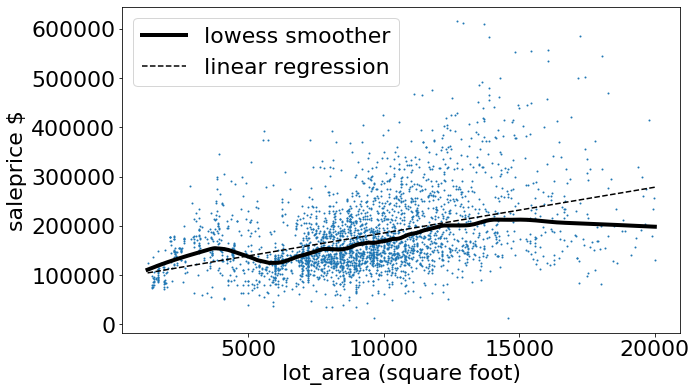

In [28]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(df_all['lot_area'][~idx_outliers],
            df_all['saleprice'][~idx_outliers],
            s = 1)
_ = ax1.plot(lowess_x, lowess_y, 'k-', linewidth = 4, label='lowess smoother')
_ = ax1.plot(x_vals,  abline_values, 'k--', label='linear regression')
_ = ax1.set_xlabel('lot_area (square foot)')
_ = ax1.set_ylabel("saleprice $")
_ = ax1.legend(loc='upper left')


In [29]:
fig.savefig(dirPOutput + '03b_LR_spline.pdf')